In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [20]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

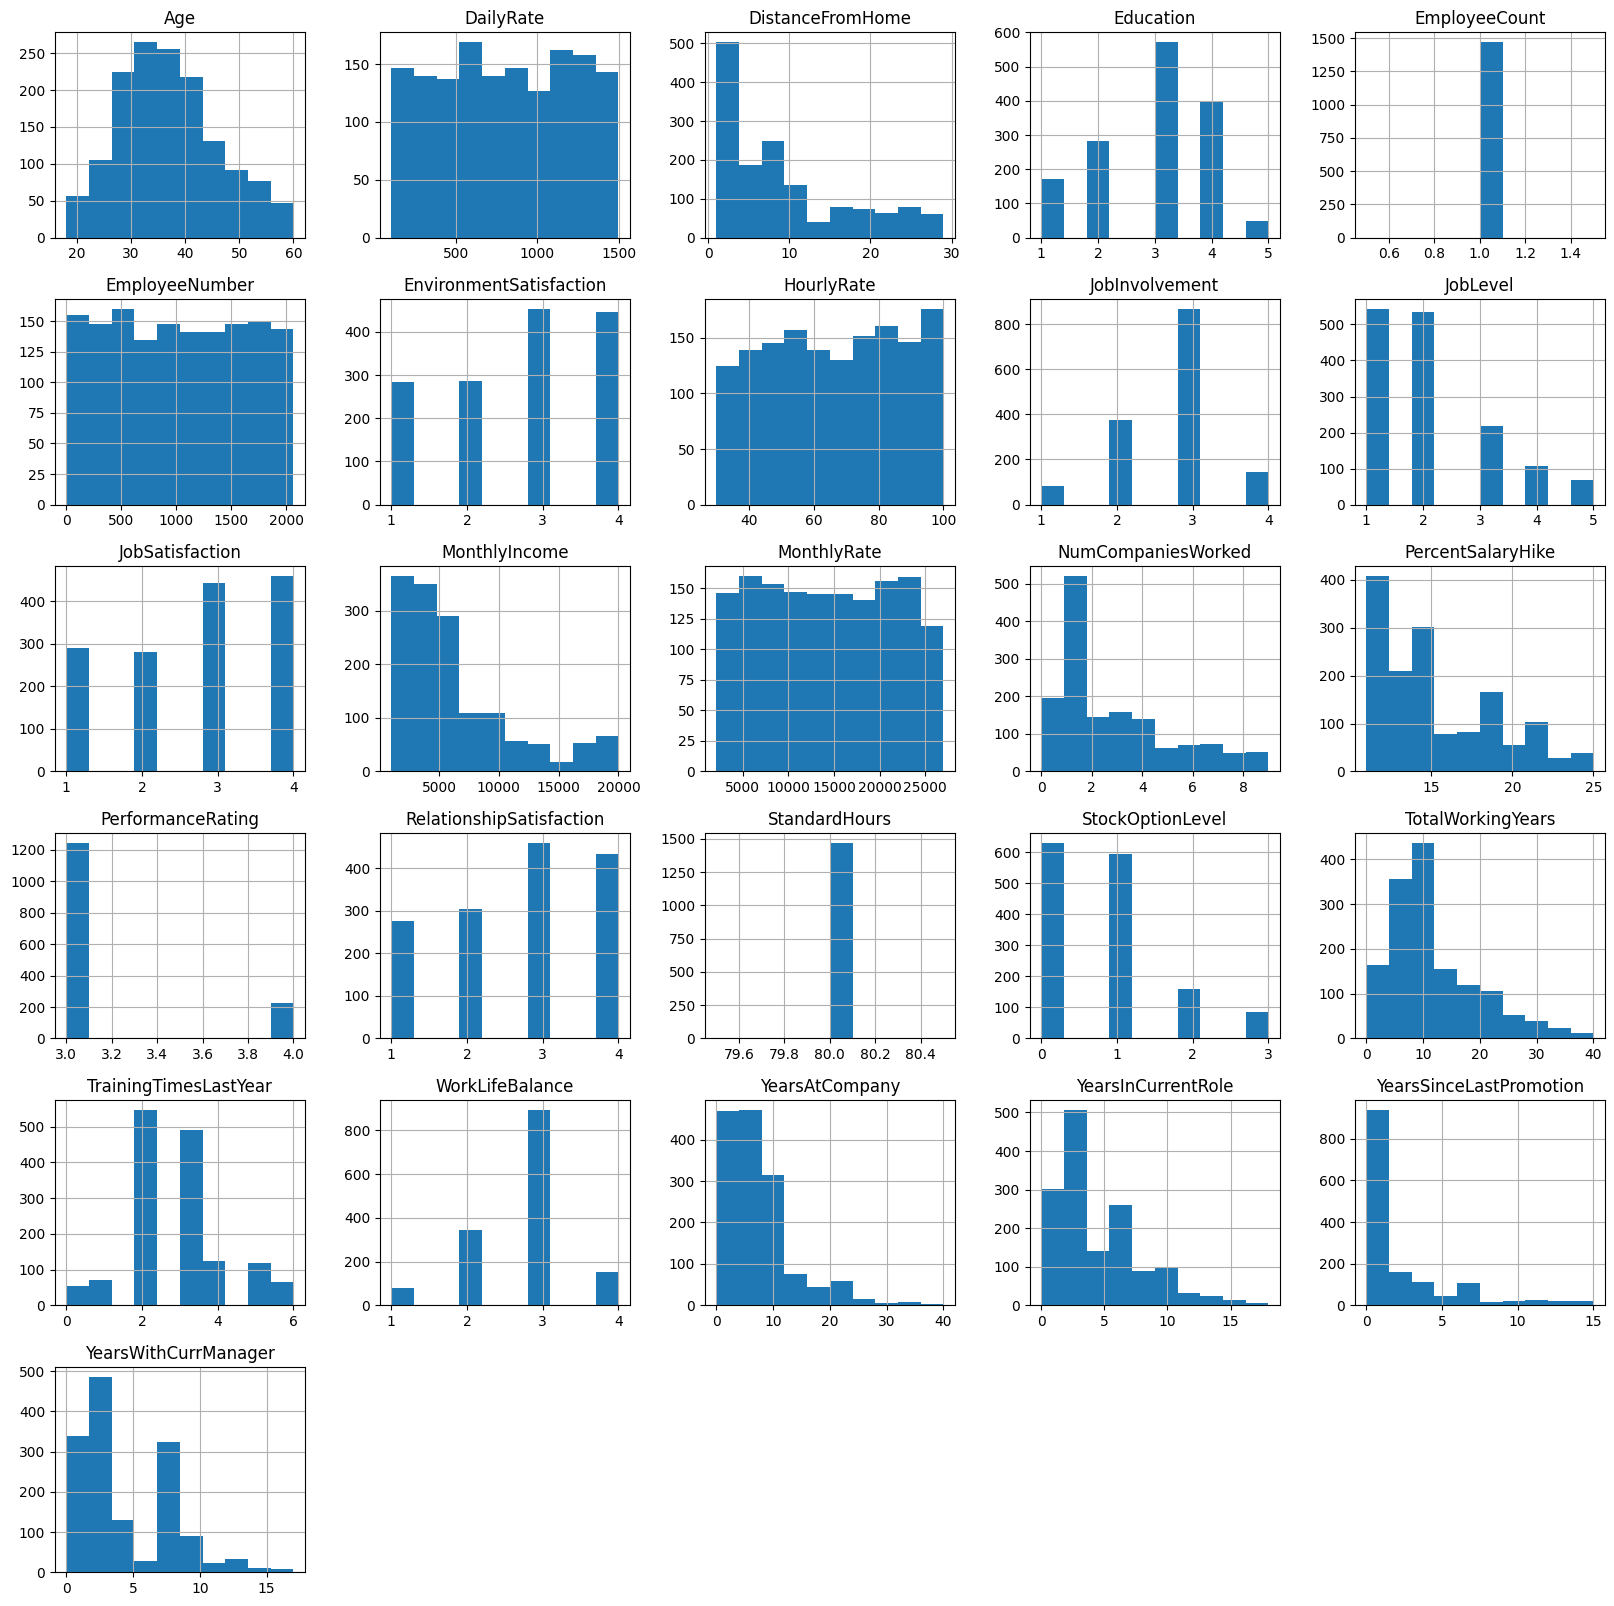

In [9]:
#We will drop unique identitifer and some categorical
df.hist(figsize=(20,20))
plt.show()

In [7]:
#For catgegorical variable it wont but rest of them ke liye rhega ye 

In [10]:
#Graph se dekh skte ki StanddardHoirs , EmployeeCounts, EmployeeNumbrs ko drop kr skte

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
df=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [13]:
#There are also some object datatype

In [14]:
for col in df.columns[1:]:
    if df[col].dtype=="object":
        print(f"{col}:{df[col].nunique()}")

Attrition:2
BusinessTravel:3
Department:3
EducationField:6
Gender:2
JobRole:9
MaritalStatus:3
OverTime:2


In [15]:
#Since these are categorical variable and we already know how to deal with Categoricall varibale

In [16]:
#How?? By Encoding

In [17]:
#For the Ones which has one two levels i will go by Label Encoding
#And for BusinessTravel , Department , MartialStatus i will do One hot Encoding
#And for EducationField and JobRole the number of levels is much larger so i will go wth Target elvel Enconding

In [18]:
#Hum koi ek se bhi ja skte but to make example of all of them we are going with it 

In [22]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for col in df.columns:
    if df[col].dtype=="object":
        if len(list(df[col].unique()))==2:
            df[col]=lb.fit_transform(df[col])


#This is a handy way when you have too many columns sometime like 500, then try to take a list of all the columns whch are object and try to convert them to one hot encoding or other is bit tricky 
#So in that case we can just run a loop like this 

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
#If you use Label Encdoding on categoricall varibale like singapore and dubaithen you will create binary like singapore -0 and dubai-1

In [26]:
#But when we have more than 2 value that is wehere label encoding creates 0,1,2... and soon 
#At that time our main concern is that will it create some noise(Yeah it maybe)
#And it also dependso on what kind of algoruthm we are using like if we are using linear regression or logistic regression
#there we are trying to  find coefficinet and magnitude of it will have lil bit oof impact thats why we try to avoid label encoding and probably use target based encoding or one hot encoding when we are using linear or logistic regression 

In [27]:
#But in decision treeye sb utna matter nhi krta 

In [29]:
df=pd.get_dummies(df,columns=['BusinessTravel','Department','MaritalStatus'],drop_first=True)

In [30]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,Life Sciences,1,1,2,0,...,6,4,0,5,False,True,False,True,False,True
1,49,0,279,8,1,Life Sciences,1,2,3,1,...,10,7,1,7,True,False,True,False,True,False
2,37,1,1373,2,2,Other,1,4,4,1,...,0,0,0,0,False,True,True,False,False,True
3,33,0,1392,3,4,Life Sciences,1,5,4,0,...,8,7,3,0,True,False,True,False,True,False
4,27,0,591,2,1,Medical,1,7,1,1,...,2,2,2,2,False,True,True,False,True,False


In [31]:
#For rest we will go by Target based Encoding
#for target based encoding to not have data leakage problem we alsways do it after tran and test split

In [32]:
target=df['Attrition']
X=df.drop(['Attrition'],axis=1)

In [36]:
#Lets check how our target variable is distributed
target.value_counts(normalize=True)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

In [38]:
#This is Basically Class imbalaced probelms so lets try to make use of SMOTE and try to balance classes little bit 


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=1, stratify=target)


In [42]:
!pip install category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import category_encoders as ce

ce_target=ce.TargetEncoder(cols=['EducationField','Jobrole'])

#X_train=ce_target.fit_transform(X_train,y_train)
#X_test=ce_target.transform(X_test)

In [50]:
X_train=ce_target.fit_transform(X_train,y_train)

ValueError: X does not contain the columns listed in cols

In [48]:
print(X_test.shape)

(294, 37)
